# Modeling the strength of concrete with ANNs

In the field of engineering, it is crucial to have accurate estimates of the performance of building materials. These estimates are required in order to develop safety guidelines governing the materials used in the construction of buildings, bridges, and roadways.

Estimating the strength of concrete is a challenge of particular interest. Although it is used in nearly every construction project, concrete performance varies greatly due to the use of a wide variety of ingredients that interact in complex ways. As a result, it is difficult to reliably predict the strength of the final product. A model that could reliably predict concrete strength given a listing of the composition of the input materials could result in safer construction practices.

## Step 1 - Collecting Data

Source material is from http://archive.ics.uci.edu/ml by I-Cheng Yeh.

This set contains 1,030 examples of concrete, with eight features describing the components used in the mixture. 

These features being related to the final compressive strength
    1. Amount (Kg per cubic meter) of 
        -Cement
        -Slag
        -Ash
        -Water
        -Superplasticizer
        -Coarse aggregate
        -Fine aggregate
        -and Aging time (Days)

## Step 2 - Exploring and preparing the data

In [37]:
concrete <- read.csv("C:/Users/Yuchi/Downloads/concrete.csv")

In [38]:
str(concrete)

'data.frame':	1030 obs. of  9 variables:
 $ ï..Cement   : num  540 540 332 332 199 ...
 $ slag        : num  0 0 142 142 132 ...
 $ ash         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ water       : num  162 162 228 228 192 228 228 228 228 228 ...
 $ superplastic: num  2.5 2.5 0 0 0 0 0 0 0 0 ...
 $ coarseagg   : num  1040 1055 932 932 978 ...
 $ fineagg     : num  676 676 594 594 826 ...
 $ age         : num  28 28 270 365 360 90 365 28 28 28 ...
 $ strength    : num  80 61.9 40.3 41 44.3 ...


Neural networks work best when input data is scaled to a narrow range around zero, and here we see values ranging anywhere from zero up to over a thousand. 

The usual solution is to rescale the data with a normalize or standardize function. If the data follows a normal distribution then it may make sense to use standardization **scale()**. Although if the data follows a uniform distribution or are severaly non-normal, then a normalization range of 0-1 is more appropriate like in this case.

In [39]:
normalize <- function(x) {
    return((x - min(x)) / (max(x) - min(x)))
}

We use the new normalize function to every column using the **lapply**

In [40]:
concrete_norm <- as.data.frame(lapply(concrete, normalize))

In [41]:
summary(concrete_norm$strength)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000000 0.2663511 0.4000872 0.4171915 0.5457207 1.0000000 

In [42]:
summary(concrete$strength)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 2.33000 23.71000 34.44500 35.81796 46.13500 82.60000 

Comparing the two you can see the difference in normalization.

Now we need to create our two sets. Our data was already in random order so we just need to portion them out.

In [43]:
concrete_train <- concrete_norm[1:773,]

In [44]:
concrete_test <- concrete_norm[774:1030,]

## Step 3 - Training a model on the data

In [45]:
install.packages("neuralnet", repos = "http://cran.us.r-project.org")

Warning message:
"package 'neuralnet' is in use and will not be installed"

In [46]:
library(neuralnet)

In [47]:
concrete_model <- neuralnet(strength ~ ï..Cement + slag + ash + water + superplastic + coarseagg + fineagg + age, data = concrete_train)

In [69]:
install.packages("NeuralNetTools", repos = "http://cran.us.r-project.org")

package 'NeuralNetTools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\yuchi\AppData\Local\Temp\RtmpKGfG4k\downloaded_packages


In [71]:
library(NeuralNetTools)

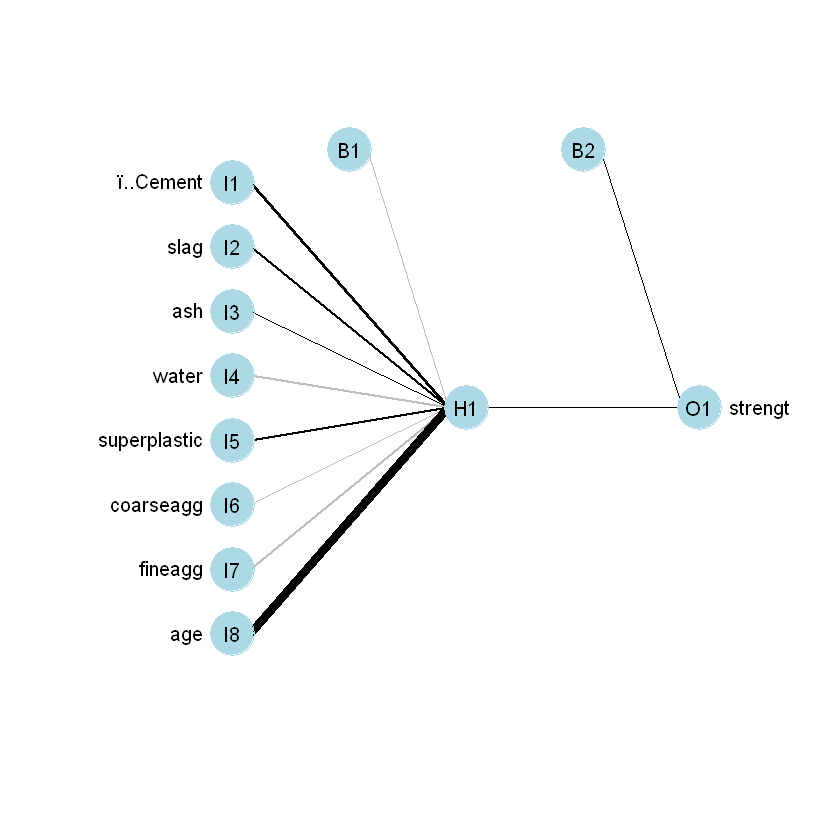

In [73]:
plotnet(concrete_model)

We have 8 features connecting to one hidden node following up to one output node that predicts concrete strength. Each B counts as a bias term.

## Step 4 - evaluating model performance

To estimate our model's performance, we can use the **compute()** function to generate predictions on the testing dataset.

In [74]:
model_results <- compute(concrete_model, concrete_test[1:8])

Compute works a bit differently from predict. It returns a list of two components $neurons, which stores the neurons for each layer in the network for each layer in the network. $net.results, which stores the predicted values.

In [75]:
predicted_strength <- model_results$net.result

Because this a numeric prediction problem rather than a classification problem, we can't use a confusion matrix to examine model accuracy. Instead, we measure correlation between our predicted concrete strength and true value. This provides insight into the strength of the linear association between the two variables.

In [76]:
cor(predicted_strength, concrete_test$strength)

0.7200891778


Correlations close to 1 resemble a strong relationship so our 0.72 shows a fairly strong relationship and demonstrates our model is doing alright.

## Step 5 - improving model performance

In [77]:
concrete_model2 <- neuralnet(strength ~ ï..Cement + slag + ash + water + superplastic + coarseagg + fineagg + age, data = concrete_train, hidden = 5) 

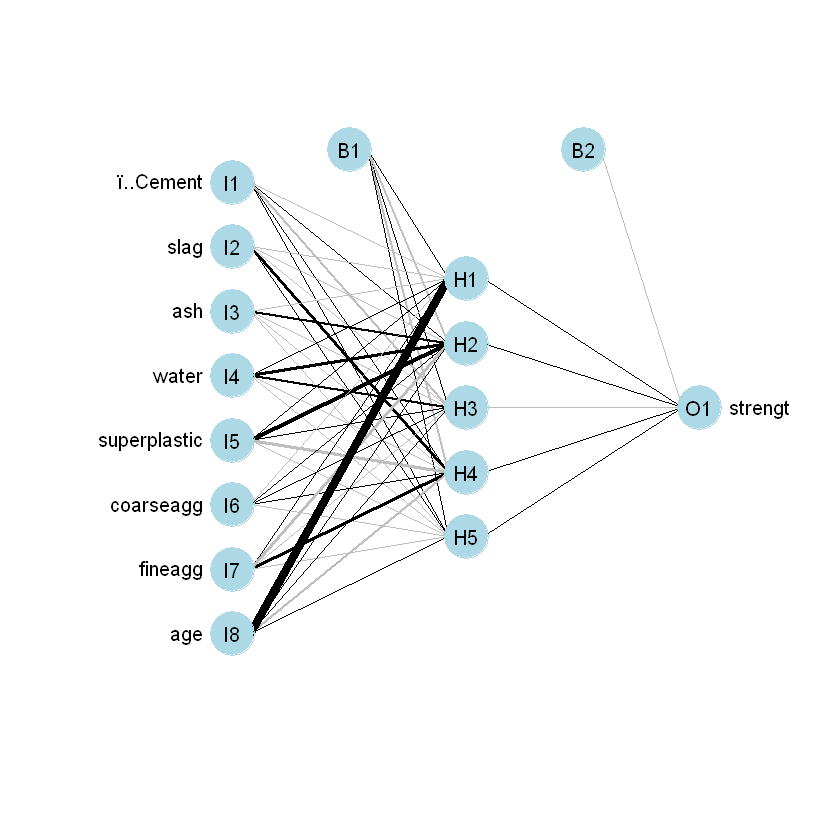

In [78]:
plotnet(concrete_model2)

In [79]:
model_results2 <- compute(concrete_model2, concrete_test[1:8])

In [80]:
predicted_strength2 <- model_results2$net.result

In [81]:
cor(predicted_strength2, concrete_test$strength)

0.814400374
